# Neural Net Model for Sentence Categorization

A Neural Network model to help classify sentences as important, or not important enough to be part of a summary

Built using Keras

https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import keras
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
sys.path.append("..")

from app.services.data_preparation import get_processed_data_sets_for_model, DATA_FILES_DIR
from app.services.sentence_tokenizer import get_chat_logs
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, Model, load_model
from sklearn.metrics import classification_report, confusion_matrix
from os.path import join

Using TensorFlow backend.


In [2]:
processed_data, data_type_log_ids, train_validation_and_test_dates = get_processed_data_sets_for_model()

FileNotFoundError: [Errno 2] No such file or directory: 'feature_extraction/data_files_v2/conversation_log_ids.json'

In [3]:
processed_data["validation_features_X"].tail()

,absolute_sentence_position,sentence_length,number_of_special_terms,sentiment_score,normalized_mean_tf_idf,normalized_mean_tf_isf
3572,1.722665,0.667918,-0.449896,0.429990,0.794489,-0.660211
3573,1.724406,-0.964506,-0.449896,-0.267278,-0.029789,2.010323
3574,1.726147,-0.783125,-0.449896,0.512711,-0.101648,0.199086
3575,1.727888,-0.964506,-0.449896,1.927926,1.617833,1.230711
3576,1.729628,-0.057604,-0.449896,0.504783,1.211230,-0.576068


In [4]:
train_features_X = processed_data["train_features_X"]
validation_features_X = processed_data["validation_features_X"]
test_features_X = processed_data["test_features_X"]
print(train_features_X.tail())

assert train_features_X.shape[1] == test_features_X.shape[1] 
assert test_features_X.shape[1] == validation_features_X.shape[1] 
print(test_features_X.shape)
test_features_X.head()

       absolute_sentence_position  sentence_length  number_of_special_terms  \
13728                    1.704054        -0.033601                 0.674254   
13729                    1.710517        -1.107969                -0.401435   
13730                    1.716980         4.621994                 0.674254   
13731                    1.723443        -0.749846                 0.674254   
13732                    1.729906        -0.570785                -0.401435   

       sentiment_score  normalized_mean_tf_idf  normalized_mean_tf_isf  
13728        -2.698176               -0.776535               -0.509469  
13729         1.441073               -1.308255               -0.917676  
13730        -2.818533               -0.808004               -0.846012  
13731         1.441073               -0.976807                0.385273  
13732        -0.273833               -0.964630               -0.070990  
(3405, 6)


,absolute_sentence_position,sentence_length,number_of_special_terms,sentiment_score,normalized_mean_tf_idf,normalized_mean_tf_isf
0,-1.730500,-0.701164,0.965860,-0.217358,-0.729511,0.457932
1,-1.726405,0.090238,2.354106,-0.217358,-0.536776,-0.517849
2,-1.722310,-0.701164,-0.422385,-0.217358,-0.630341,0.043949
3,-1.718216,0.288089,-0.422385,-0.217358,-0.107571,-0.625060
4,-1.714121,-0.899014,-0.422385,-0.775119,-0.625652,1.596072


In [5]:
train_y = processed_data["train_y"]
validation_y = processed_data["validation_y"]
test_y = processed_data["test_y"]
print(test_y.shape)
test_y

(3405, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [6]:
data_type_log_ids["test"][:5]

[144080, 144081, 144082, 144083, 144084]

In [7]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_features_X.shape[1]

#add model layers
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 5,594
Trainable params: 5,594
Non-trainable params: 0
_________________________________________________________________


In [9]:
EPOCHS = 1000
BATCH_SIZE = 64
OPTIMIZER = "adam"
#compile model using mse as a measure of model performance
model.compile(
    optimizer=OPTIMIZER, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
#train model
# Takes about 5230.725239038467  seconds About 1 and 1/2 hours for 1000 epochs
start = time.time()
history = model.fit(
    train_features_X,
    train_y, 
    epochs=EPOCHS,
    # validation_split=0.4
    validation_data=(validation_features_X, validation_y),
    batch_size=BATCH_SIZE
)
end = time.time()
time_taken_in_minutes = (end-start)//60
print(end-start, " seconds")

Instructions for updating:
Use tf.cast instead.
Train on 13733 samples, validate on 3577 samples
Epoch 1/1000
13733/13733 [==============================] - 1s 42us/step - loss: 0.1735 - acc: 0.9661 - val_loss: 0.0928 - val_acc: 0.9821
Epoch 2/1000
13733/13733 [==============================] - 0s 27us/step - loss: 0.1415 - acc: 0.9661 - val_loss: 0.0903 - val_acc: 0.9821
Epoch 3/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.1397 - acc: 0.9661 - val_loss: 0.0917 - val_acc: 0.9821
Epoch 4/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.1395 - acc: 0.9661 - val_loss: 0.0873 - val_acc: 0.9821
Epoch 5/1000
13733/13733 [==============================] - 0s 20us/step - loss: 0.1391 - acc: 0.9661 - val_loss: 0.0908 - val_acc: 0.9821
Epoch 6/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.1378 - acc: 0.9661 - val_loss: 0.0966 - val_acc: 0.9821
Epoch 7/1000
13733/13733 [==============================] - 0s 21us/s

13733/13733 [==============================] - 0s 26us/step - loss: 0.1143 - acc: 0.9674 - val_loss: 0.1084 - val_acc: 0.9774
Epoch 116/1000
13733/13733 [==============================] - 0s 27us/step - loss: 0.1151 - acc: 0.9665 - val_loss: 0.1078 - val_acc: 0.9762
Epoch 117/1000
13733/13733 [==============================] - 0s 34us/step - loss: 0.1135 - acc: 0.9677 - val_loss: 0.1132 - val_acc: 0.9774
Epoch 118/1000
13733/13733 [==============================] - 0s 34us/step - loss: 0.1139 - acc: 0.9670 - val_loss: 0.1024 - val_acc: 0.9802
Epoch 119/1000
13733/13733 [==============================] - 0s 29us/step - loss: 0.1126 - acc: 0.9674 - val_loss: 0.1019 - val_acc: 0.9785
Epoch 120/1000
13733/13733 [==============================] - 0s 27us/step - loss: 0.1138 - acc: 0.9673 - val_loss: 0.1070 - val_acc: 0.9790
Epoch 121/1000
13733/13733 [==============================] - 0s 32us/step - loss: 0.1125 - acc: 0.9672 - val_loss: 0.1115 - val_acc: 0.9774
Epoch 122/1000
13733/13733 [

13733/13733 [==============================] - 0s 33us/step - loss: 0.0907 - acc: 0.9709 - val_loss: 0.1424 - val_acc: 0.9648
Epoch 232/1000
13733/13733 [==============================] - 0s 34us/step - loss: 0.0915 - acc: 0.9709 - val_loss: 0.1359 - val_acc: 0.9690
Epoch 233/1000
13733/13733 [==============================] - 0s 31us/step - loss: 0.0910 - acc: 0.9710 - val_loss: 0.1306 - val_acc: 0.9706
Epoch 234/1000
13733/13733 [==============================] - 0s 31us/step - loss: 0.0924 - acc: 0.9700 - val_loss: 0.1415 - val_acc: 0.9690
Epoch 235/1000
13733/13733 [==============================] - 0s 29us/step - loss: 0.0913 - acc: 0.9711 - val_loss: 0.1308 - val_acc: 0.9718
Epoch 236/1000
13733/13733 [==============================] - 0s 30us/step - loss: 0.0898 - acc: 0.9712 - val_loss: 0.1348 - val_acc: 0.9695
Epoch 237/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0907 - acc: 0.9709 - val_loss: 0.1255 - val_acc: 0.9762
Epoch 238/1000
13733/13733 [

13733/13733 [==============================] - 0s 29us/step - loss: 0.0730 - acc: 0.9761 - val_loss: 0.1751 - val_acc: 0.9634
Epoch 348/1000
13733/13733 [==============================] - 0s 30us/step - loss: 0.0786 - acc: 0.9738 - val_loss: 0.1901 - val_acc: 0.9553
Epoch 349/1000
13733/13733 [==============================] - 0s 26us/step - loss: 0.0749 - acc: 0.9751 - val_loss: 0.1652 - val_acc: 0.9648
Epoch 350/1000
13733/13733 [==============================] - 0s 31us/step - loss: 0.0744 - acc: 0.9752 - val_loss: 0.1544 - val_acc: 0.9698
Epoch 351/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.0743 - acc: 0.9755 - val_loss: 0.1586 - val_acc: 0.9684
Epoch 352/1000
13733/13733 [==============================] - 0s 20us/step - loss: 0.0724 - acc: 0.9763 - val_loss: 0.1657 - val_acc: 0.9670
Epoch 353/1000
13733/13733 [==============================] - 0s 28us/step - loss: 0.0731 - acc: 0.9760 - val_loss: 0.1674 - val_acc: 0.9667
Epoch 354/1000
13733/13733 [

Epoch 463/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.0693 - acc: 0.9770 - val_loss: 0.2049 - val_acc: 0.9631
Epoch 464/1000
13733/13733 [==============================] - 0s 27us/step - loss: 0.0685 - acc: 0.9759 - val_loss: 0.2087 - val_acc: 0.9620
Epoch 465/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0665 - acc: 0.9779 - val_loss: 0.1981 - val_acc: 0.9634
Epoch 466/1000
13733/13733 [==============================] - 0s 23us/step - loss: 0.0659 - acc: 0.9774 - val_loss: 0.2075 - val_acc: 0.9623
Epoch 467/1000
13733/13733 [==============================] - 0s 28us/step - loss: 0.0653 - acc: 0.9774 - val_loss: 0.1956 - val_acc: 0.9648
Epoch 468/1000
13733/13733 [==============================] - 0s 30us/step - loss: 0.0642 - acc: 0.9785 - val_loss: 0.1941 - val_acc: 0.9642
Epoch 469/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0648 - acc: 0.9788 - val_loss: 0.1944 - val_acc: 0.9651
Epoch 470/100

13733/13733 [==============================] - 0s 20us/step - loss: 0.0642 - acc: 0.9787 - val_loss: 0.2151 - val_acc: 0.9617
Epoch 522/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.0627 - acc: 0.9790 - val_loss: 0.1977 - val_acc: 0.9639
Epoch 523/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0606 - acc: 0.9804 - val_loss: 0.2027 - val_acc: 0.9642
Epoch 524/1000
13733/13733 [==============================] - 0s 20us/step - loss: 0.0637 - acc: 0.9779 - val_loss: 0.2205 - val_acc: 0.9575
Epoch 525/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0591 - acc: 0.9792 - val_loss: 0.2033 - val_acc: 0.9665
Epoch 526/1000
13733/13733 [==============================] - 0s 19us/step - loss: 0.0649 - acc: 0.9779 - val_loss: 0.2148 - val_acc: 0.9586
Epoch 527/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0656 - acc: 0.9771 - val_loss: 0.2209 - val_acc: 0.9583
Epoch 528/1000
13733/13733 [

13733/13733 [==============================] - 0s 19us/step - loss: 0.0634 - acc: 0.9780 - val_loss: 0.2309 - val_acc: 0.9656
Epoch 638/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.0592 - acc: 0.9801 - val_loss: 0.2226 - val_acc: 0.9642
Epoch 639/1000
13733/13733 [==============================] - 0s 29us/step - loss: 0.0558 - acc: 0.9812 - val_loss: 0.2507 - val_acc: 0.9567
Epoch 640/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.0593 - acc: 0.9798 - val_loss: 0.2165 - val_acc: 0.9648
Epoch 641/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.0554 - acc: 0.9817 - val_loss: 0.2423 - val_acc: 0.9581
Epoch 642/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0573 - acc: 0.9803 - val_loss: 0.2322 - val_acc: 0.9558
Epoch 643/1000
13733/13733 [==============================] - 0s 24us/step - loss: 0.0554 - acc: 0.9813 - val_loss: 0.2178 - val_acc: 0.9611
Epoch 644/1000
13733/13733 [

13733/13733 [==============================] - 0s 24us/step - loss: 0.0517 - acc: 0.9814 - val_loss: 0.2455 - val_acc: 0.9586
Epoch 754/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.0504 - acc: 0.9826 - val_loss: 0.2401 - val_acc: 0.9561
Epoch 755/1000
13733/13733 [==============================] - 0s 20us/step - loss: 0.0524 - acc: 0.9814 - val_loss: 0.2758 - val_acc: 0.9528
Epoch 756/1000
13733/13733 [==============================] - 0s 20us/step - loss: 0.0517 - acc: 0.9819 - val_loss: 0.2499 - val_acc: 0.9592
Epoch 757/1000
13733/13733 [==============================] - 0s 20us/step - loss: 0.0514 - acc: 0.9825 - val_loss: 0.2499 - val_acc: 0.9597
Epoch 758/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.0513 - acc: 0.9822 - val_loss: 0.2512 - val_acc: 0.9595
Epoch 759/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.0547 - acc: 0.9815 - val_loss: 0.2400 - val_acc: 0.9642
Epoch 760/1000
13733/13733 [

13733/13733 [==============================] - 0s 23us/step - loss: 0.0474 - acc: 0.9842 - val_loss: 0.2689 - val_acc: 0.9597
Epoch 870/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0522 - acc: 0.9830 - val_loss: 0.2641 - val_acc: 0.9597
Epoch 871/1000
13733/13733 [==============================] - 0s 23us/step - loss: 0.0488 - acc: 0.9838 - val_loss: 0.3040 - val_acc: 0.9508
Epoch 872/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.0485 - acc: 0.9832 - val_loss: 0.2896 - val_acc: 0.9514
Epoch 873/1000
13733/13733 [==============================] - 0s 24us/step - loss: 0.0582 - acc: 0.9807 - val_loss: 0.2592 - val_acc: 0.9595
Epoch 874/1000
13733/13733 [==============================] - 0s 22us/step - loss: 0.0568 - acc: 0.9819 - val_loss: 0.2410 - val_acc: 0.9595
Epoch 875/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.0495 - acc: 0.9832 - val_loss: 0.2534 - val_acc: 0.9597
Epoch 876/1000
13733/13733 [

13733/13733 [==============================] - 0s 30us/step - loss: 0.0475 - acc: 0.9841 - val_loss: 0.2754 - val_acc: 0.9542
Epoch 986/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.0469 - acc: 0.9846 - val_loss: 0.2699 - val_acc: 0.9564
Epoch 987/1000
13733/13733 [==============================] - 0s 23us/step - loss: 0.0452 - acc: 0.9851 - val_loss: 0.2695 - val_acc: 0.9569
Epoch 988/1000
13733/13733 [==============================] - 0s 25us/step - loss: 0.0494 - acc: 0.9835 - val_loss: 0.2757 - val_acc: 0.9544
Epoch 989/1000
13733/13733 [==============================] - 0s 24us/step - loss: 0.0505 - acc: 0.9833 - val_loss: 0.2968 - val_acc: 0.9544
Epoch 990/1000
13733/13733 [==============================] - 0s 27us/step - loss: 0.0473 - acc: 0.9838 - val_loss: 0.2845 - val_acc: 0.9530
Epoch 991/1000
13733/13733 [==============================] - 0s 21us/step - loss: 0.0462 - acc: 0.9844 - val_loss: 0.2707 - val_acc: 0.9595
Epoch 992/1000
13733/13733 [

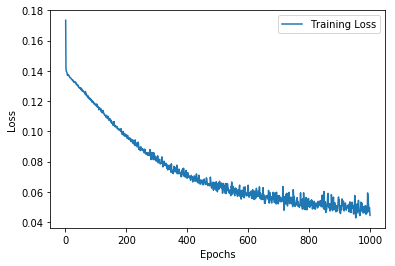

In [11]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

https://www.kaggle.com/akashsri99/deep-learning-iris-dataset-keras

In [31]:
TIME_OFFSET = 1554206530
time_now = time.time()
month_day =time.strftime("%m-%d")
time_now-TIME_OFFSET

963.6867718696594

In [32]:
model_filename = month_day + "_{}_{}_{}_{}_{}min".format(
    int(time_now-TIME_OFFSET), 
    EPOCHS, 
    BATCH_SIZE, 
    OPTIMIZER,
    int(time_taken_in_minutes)
)
MODELS_DIR = join(DATA_FILES_DIR, "models")
model_filename = join(MODELS_DIR,  model_filename + '_ff_neural_net.h5')
# model_filename = join(DATA_FILES_DIR, "2019-04-02-(14_42_44) ff_neural_net.h5")
model_filename

'../feature_extraction/data_files/models/04-02_963_1000_64_adam_5min_ff_neural_net.h5'

In [33]:
model.save(model_filename)

In [19]:
loaded_model = load_model(model_filename)

In [20]:
test_y_predictions = loaded_model.predict([test_features_X])
validation_y_predictions = loaded_model.predict([validation_features_X])

test_y_argmax = np.argmax(test_y,axis=1)
validation_y_argmax = np.argmax(validation_y,axis=1)

test_y_predictions_argmax = np.argmax(test_y_predictions, axis=1)
validation_y_predictions_argmax = np.argmax(validation_y_predictions, axis=1)

In [21]:
test_y_predictions[:10]

array([[8.7000513e-01, 1.2999488e-01],
       [9.0280968e-01, 9.7190306e-02],
       [9.9409074e-01, 5.9092366e-03],
       [9.8209733e-01, 1.7902633e-02],
       [9.9981982e-01, 1.8021915e-04],
       [9.9975282e-01, 2.4716993e-04],
       [9.9900514e-01, 9.9491910e-04],
       [9.4504535e-01, 5.4954689e-02],
       [1.0000000e+00, 3.9346370e-32],
       [1.0000000e+00, 2.2226523e-17]], dtype=float32)

In [22]:
test_y_predictions_argmax[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
test_y_argmax[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
print(classification_report(test_y_argmax, test_y_predictions_argmax))
print(confusion_matrix(test_y_argmax, test_y_predictions_argmax))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3282
           1       0.06      0.05      0.06       123

   micro avg       0.94      0.94      0.94      3405
   macro avg       0.51      0.51      0.51      3405
weighted avg       0.93      0.94      0.94      3405

[[3194   88]
 [ 117    6]]


In [25]:
from rouge_metrics import *

test_chat_logs = get_chat_logs(data_type_log_ids["test"])
predicted_chat_logs = [test_chat_logs[index] for index, value in enumerate(test_y_predictions_argmax) if value==1]
summaries_chat_logs = [test_chat_logs[index] for index, value in enumerate(test_y_argmax) if value==1]

predicted_chat_logs = "".join(log for log in predicted_chat_logs)
summaries_chat_logs = "".join(log for log in summaries_chat_logs)
print("SUMMARIES\n---------\n", summaries_chat_logs[:1000])
print("PREDICTIONS\n-----------\n", predicted_chat_logs[:1000])

hypotheses = [predicted_chat_logs]
references = [summaries_chat_logs]
print("ROUGE Scores\n------------")
print_rouge_results(get_rouge_results(hypotheses, references))

SUMMARIES
---------
 where you planning a single exception raised to the app level or should I make forms handle the various errors at the app level
it's because the event system can't keep up with the movement
I'm going to make the provider='odbc' and take all the special meaning out of it
what's next big ticket in designer?
need to clean up the UI system
... add drag and drop support for automatically pulling fields/datasources
... generalize the designer code so that it can be used w/reports/etc
... use BOA (if installed) for code editing
insert a duplicate key into table
gnuef used to generate pop up dialogs and recover when a dberror was encountered
say I query 10 records
I have a resultset with 10 recordsets
I change the first 3 
which causes the _updateFlag's to be set on those records
and I insert a new record at the end
I go to commit the changes
and it performs the updates on the first 3
and resets the _updateFlag (since they've been updated)
then inserts the last one
but it 

In [26]:
print(classification_report(validation_y_argmax, validation_y_predictions_argmax))
print(confusion_matrix(validation_y_argmax, validation_y_predictions_argmax))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3513
           1       0.04      0.06      0.05        64

   micro avg       0.95      0.95      0.95      3577
   macro avg       0.51      0.52      0.51      3577
weighted avg       0.97      0.95      0.96      3577

[[3406  107]
 [  60    4]]
